In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [4]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep = r"\s+", skiprows = 22, header = None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE",
                 "DIS","RAD","TAX","PTRATIO","B","LSTAT"]

data = pd.DataFrame(X, columns = feature_names)
data['Sale Price'] = y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.shape

(506, 14)

In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


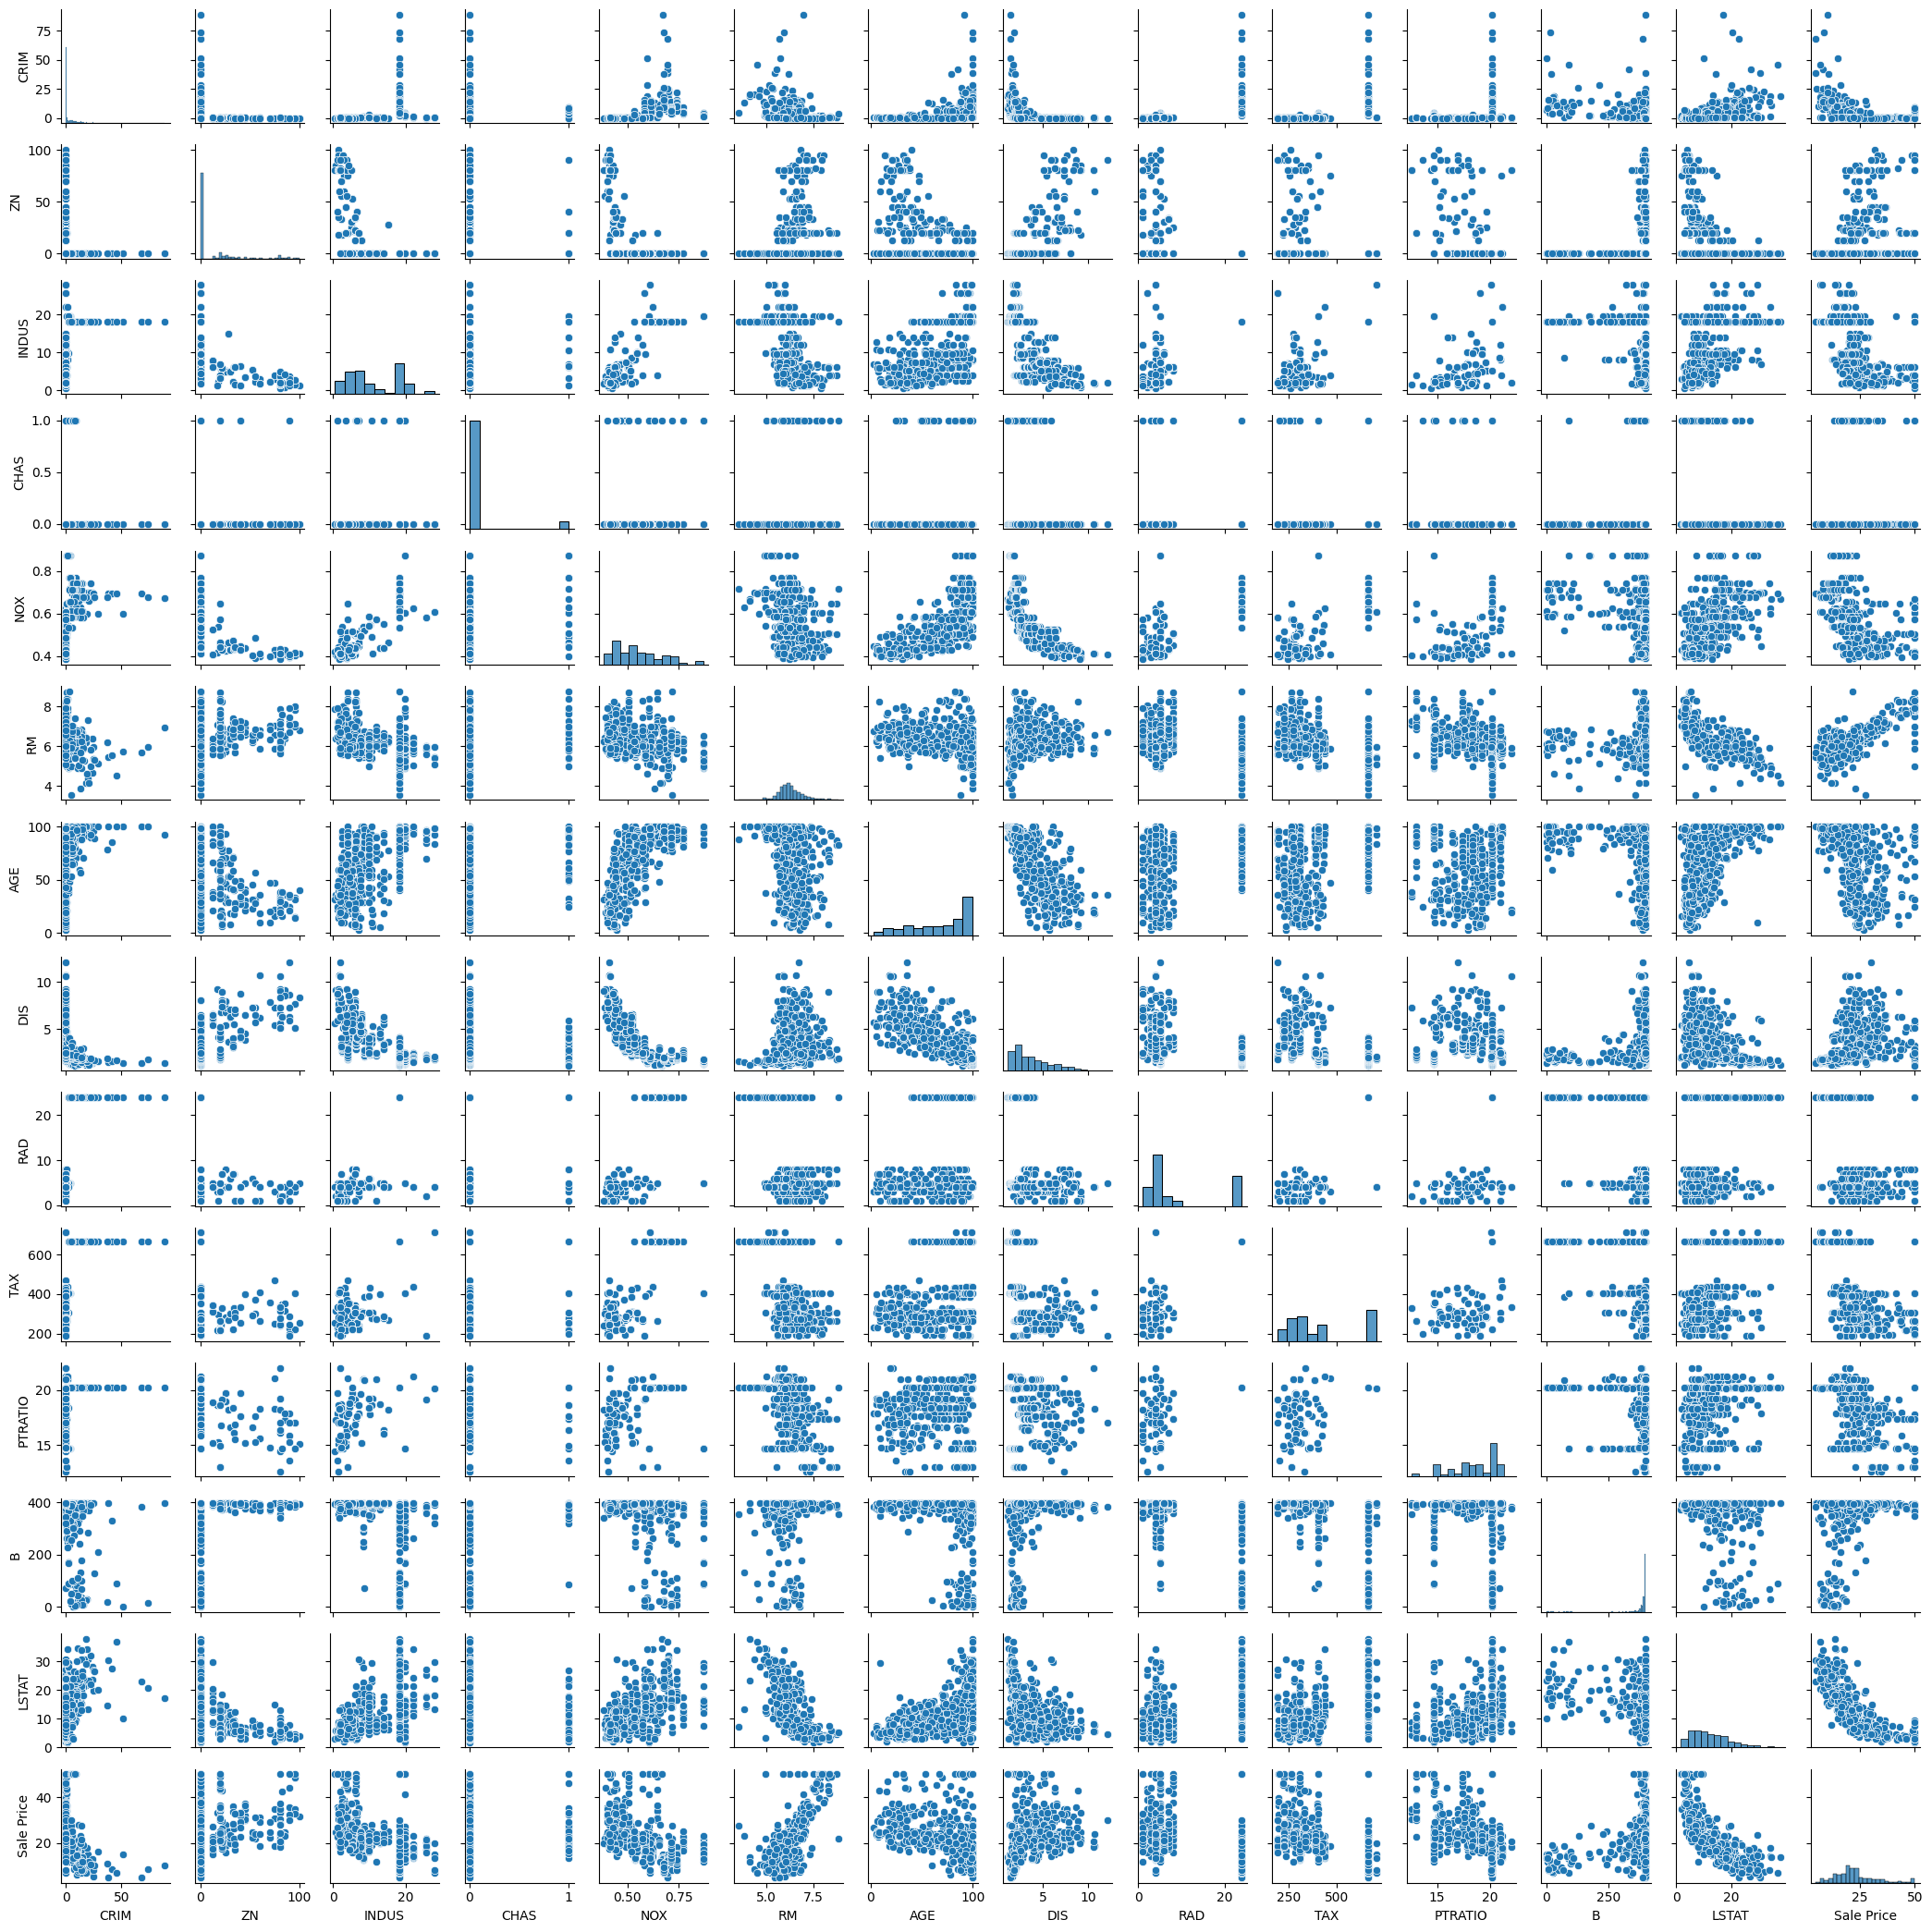

In [12]:
sns.pairplot(data, height = 1.5)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3782687948.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Sale Price'])


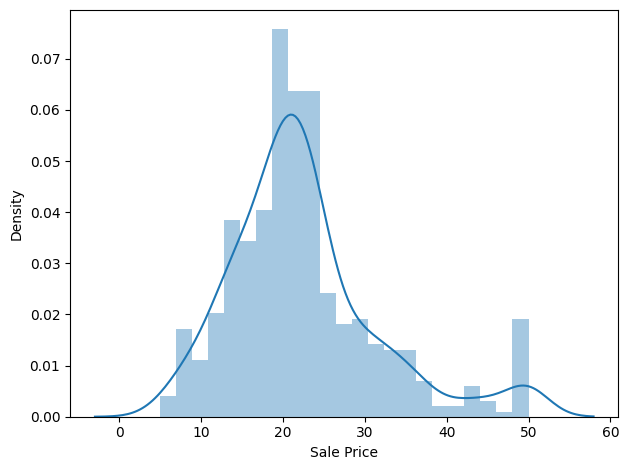

In [19]:
sns.distplot(data['Sale Price'])
plt.tight_layout()
plt.show()

In [22]:
print("Skewness: %f" % data["Sale Price"].skew())
print("Kurtosis: %f" % data["Sale Price"].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


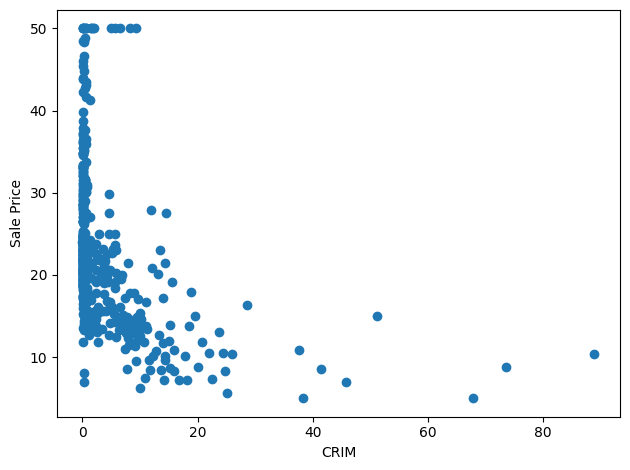

In [27]:
fig, ax = plt.subplots() #fig: khung chứa biểu đồ, ax:nơi vẽ dữ liệu, 1 bản đồ cụ thể
ax.scatter(x = data['CRIM'], y = data['Sale Price'])
plt.ylabel('Sale Price')
plt.xlabel('CRIM')
plt.tight_layout()
plt.show()

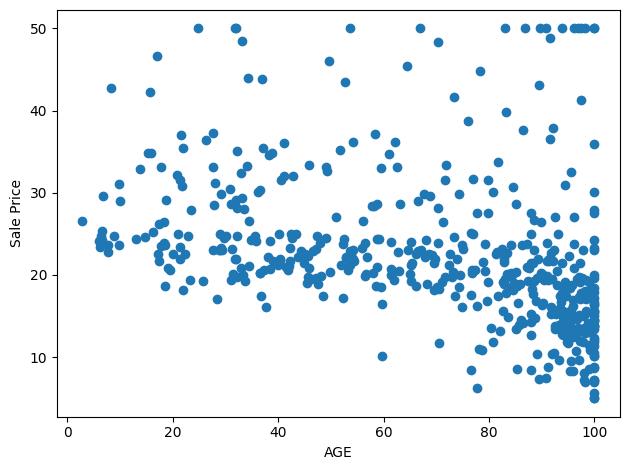

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['Sale Price'])
plt.ylabel('Sale Price')
plt.xlabel('AGE')
plt.tight_layout()
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-318180533.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc = "best")



 mu = 22.53 and sigma = 9.19 



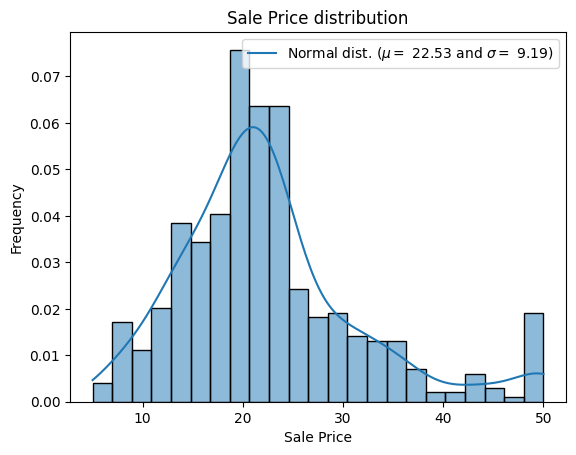

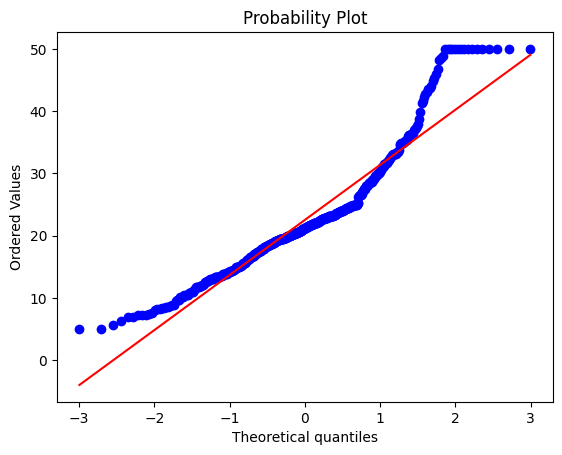

In [37]:
from scipy import stats
from scipy.stats import norm, skew

sns.histplot(data['Sale Price'], kde = True, stat = "density")
(mu, sigma) = norm.fit(data['Sale Price'])
print("\n mu = {:.2f} and sigma = {:.2f} \n".format(mu, sigma))
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc = "best")
plt.ylabel("Frequency")
plt.title("Sale Price distribution")
fig = plt.figure()
res = stats.probplot(data['Sale Price'], plot = plt)
plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-2053086408.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc = "best")



 mu = 3.09 and sigma = 0.39 



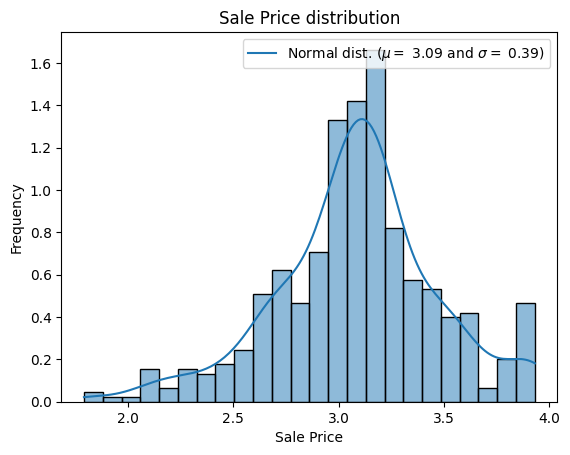

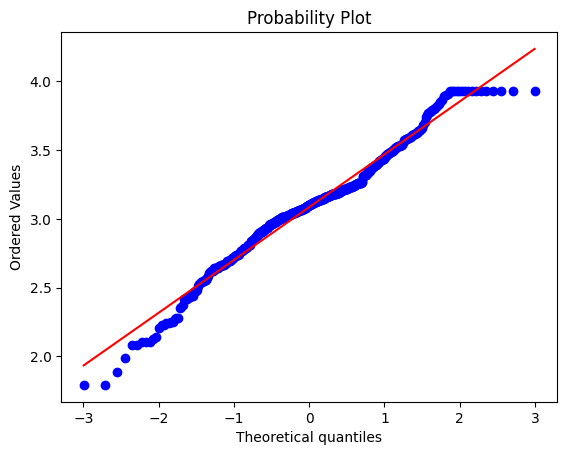

In [38]:
data["Sale Price"] = np.log1p(data["Sale Price"])
sns.histplot(data['Sale Price'], kde = True, stat = "density")
(mu, sigma) = norm.fit(data['Sale Price'])
print("\n mu = {:.2f} and sigma = {:.2f} \n".format(mu, sigma))
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu, sigma)], loc = "best")
plt.ylabel("Frequency")
plt.title("Sale Price distribution")
fig = plt.figure()
res = stats.probplot(data['Sale Price'], plot = plt)
plt.show()

In [39]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Sale Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,3.218876
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,3.117950
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,3.575151
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,3.538057
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,3.616309


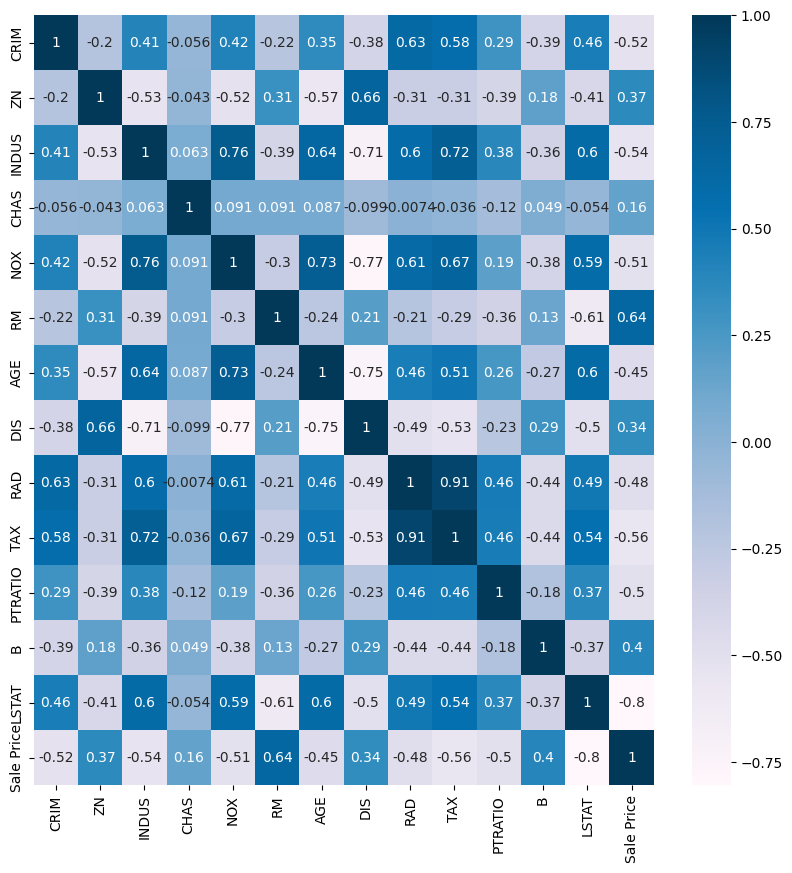

In [43]:
plt.figure(figsize=(10, 10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [48]:
cor_target = abs(cor["Sale Price"]) #Lấy các cột tương quan của tất cả các features với Sale Price với trị tuyệt đối
relevant_features = cor_target[cor_target > 0.2] #Lọc ra các cột tương quan với Sale Price lớn hơn 0.2
names = relevant_features.index.to_list() #Lấy tên các cột tương quan
names.remove("Sale Price") #Loại bỏ cột Sale Price
print(names)
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


In [49]:
from sklearn.model_selection import train_test_split
X = data.drop("Sale Price", axis = 1) #axis = 1: Xóa theo cột bỏ luôn cột Sale Price
y = data["Sale Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #Tạo mô hình Linear Regression mới
lr.fit(X_train, y_train) #Mô hình sẽ học mối quan hệ giữa X_train và y_train để tìm ra các hệ số w và b

LinearRegression()

In [54]:
predictions = lr.predict(X_test) #Dự đoán giá nhà cho X_test

print("Actual value of the house: ", y_test[0])
print("Model predicted value: ", predictions[0])
#Giá trị dự đoán của model cao hơn so với thực tế 1 chút

Actual value of the house:  3.2188758248682006
Model predicted value:  3.3668949799969594


In [55]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(mse)

0.03532837249537237
